## **INTRODUCTION**



Predicting customer satisfaction with an airline is a challenging task in the aviation sector. Since more and more people are flying, it is essential for airlines to learn about and fulfil their customers' expectations in order to give them an excellent travel experience.

The objective of the project is to help airlines to find important factors that affect passenger satisfaction so that they can constantly improve their services. Airlines can identify areas for improvement, customise their services, and learn more about the  preferences of their customers by properly anticipating their fulfilment levels.

Initialising and importing required packages

In [48]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV

DATASET:

This project's dataset is made up of survey data on airline passenger satisfaction. The dataset contains a variety of information, including ratings for various parts of the passenger experience as well as gender, customer type, age, kind of travel, class, and trip distance. The target variable is the degree of satisfaction, which is divided into "Satisfaction" and "Neutral or Dissatisfied" categories.

data source: https://www.kaggle.com/code/ricktenbult/airline-satisfaction-prediction

In [3]:
train= pd.read_csv('/bin/Untitled Folder/train.csv')
test=pd.read_csv('/bin/Untitled Folder/test.csv')
train.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


##**Methods**

PRELIMINARY ANALYSIS

To obtain understanding of the  data and to understand its properties, it is essential to perform a preliminary study of the dataset before beginning the predictive modelling.

Data Overview

In [61]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,13,0,0,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,1,25,1,1,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,0,26,1,1,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,0,25,1,1,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,0,61,1,1,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [4]:
train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [62]:
train.shape

(103594, 23)

IDENTIFY MISSING VALUES

as part of data preprocessing . it is important to deal with missing values. before that, let's analyse the features and check wheather there is any missing values in them.

In [5]:
train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [7]:
train.dropna(inplace=True) # removing all rows with null values from the train dataset.

In [8]:
train.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [9]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Exploratory Data Analysis

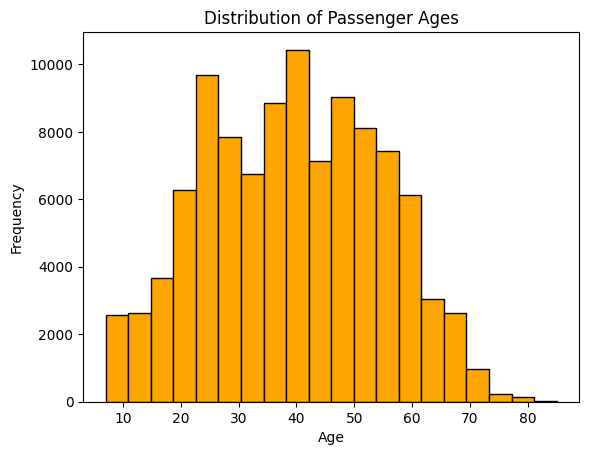

In [10]:
# Plotting the histogram of Age column
plt.hist(train['Age'], bins=20, color='orange', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Ages')
plt.show()

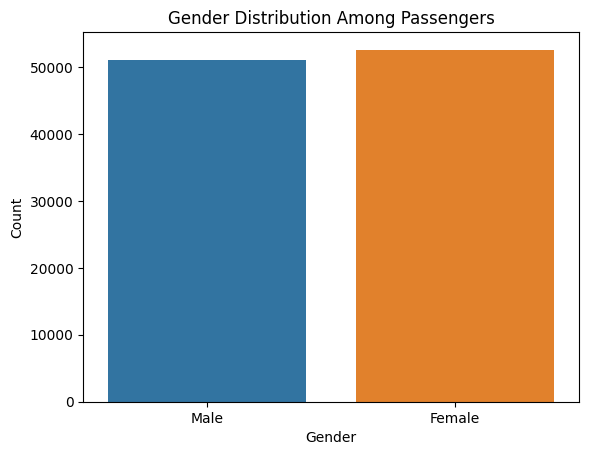

In [12]:
# Creating the bar graph
sns.countplot(x='Gender', data=train)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution Among Passengers')
plt.show()

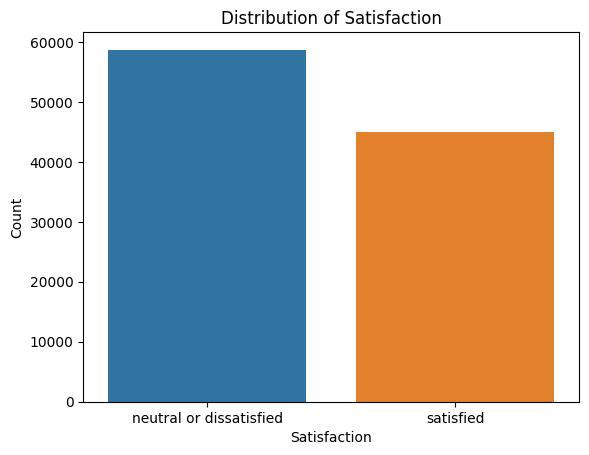

In [13]:
# Determine the frequency of each kind of satisfaction.
count_of_satisfaction = train['satisfaction'].value_counts()

# Plotting the bar plot using seaborn
sns.barplot(x=count_of_satisfaction.index, y=count_of_satisfaction.values)

# Set x-label, y-label, and title
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.title('Distribution of Satisfaction')

# Show the plot
plt.show()

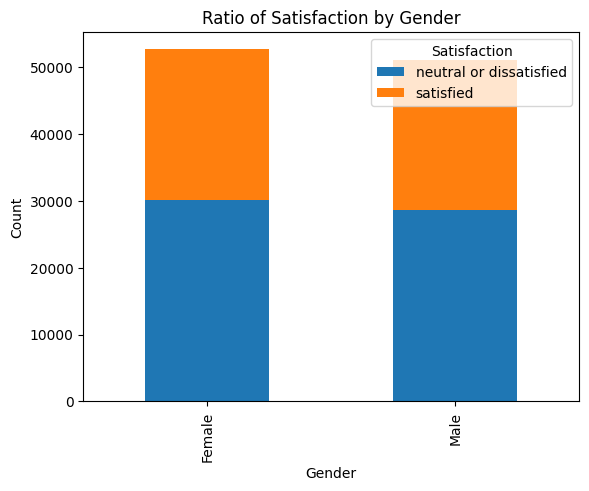

In [14]:
# Generate the count after combining the data by gender and level of satisfaction

count_of_gender_satisfaction = train.groupby(['Gender', 'satisfaction']).size().unstack()

# Plotting the stacked bar plot
count_of_gender_satisfaction.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Ratio of Satisfaction by Gender')
plt.legend(title='Satisfaction', loc='upper right')
plt.show()

<Axes: xlabel='Class', ylabel='count'>

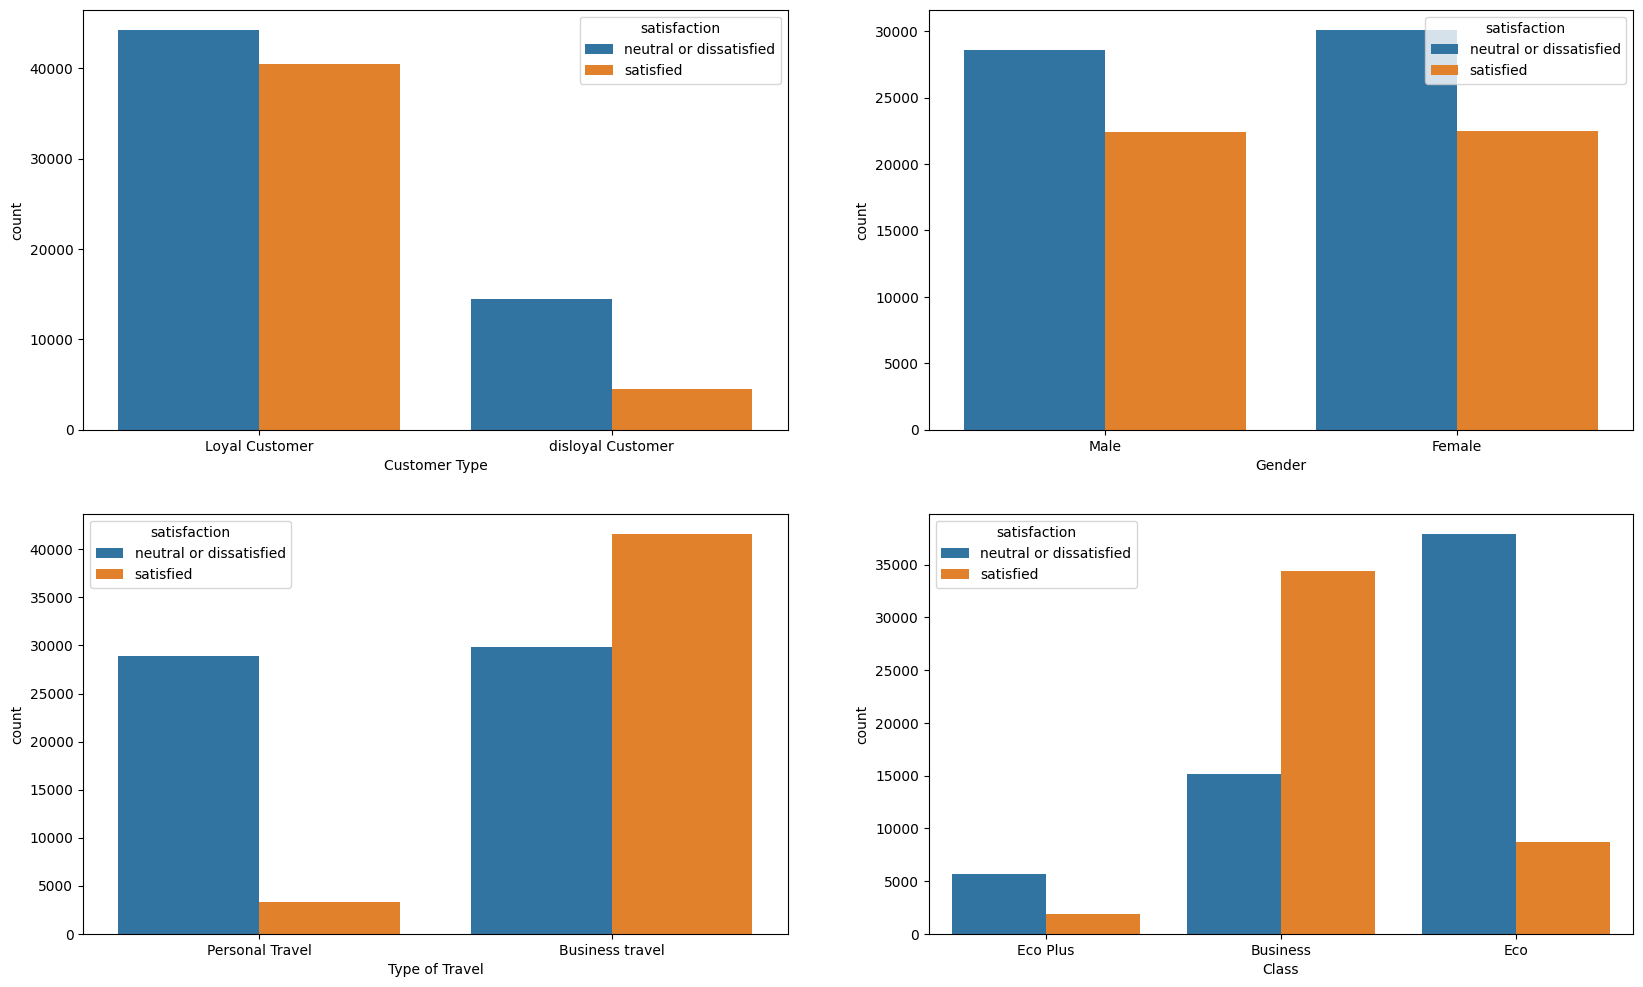

In [15]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Customer Type', hue = 'satisfaction',data = train, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'satisfaction',data = train, ax=axarr[0][1])
sns.countplot(x='Type of Travel', hue = 'satisfaction',data = train, ax=axarr[1][0])
sns.countplot(x='Class', hue = 'satisfaction',data = train, ax=axarr[1][1])

<Axes: xlabel='satisfaction', ylabel='Arrival Delay in Minutes'>

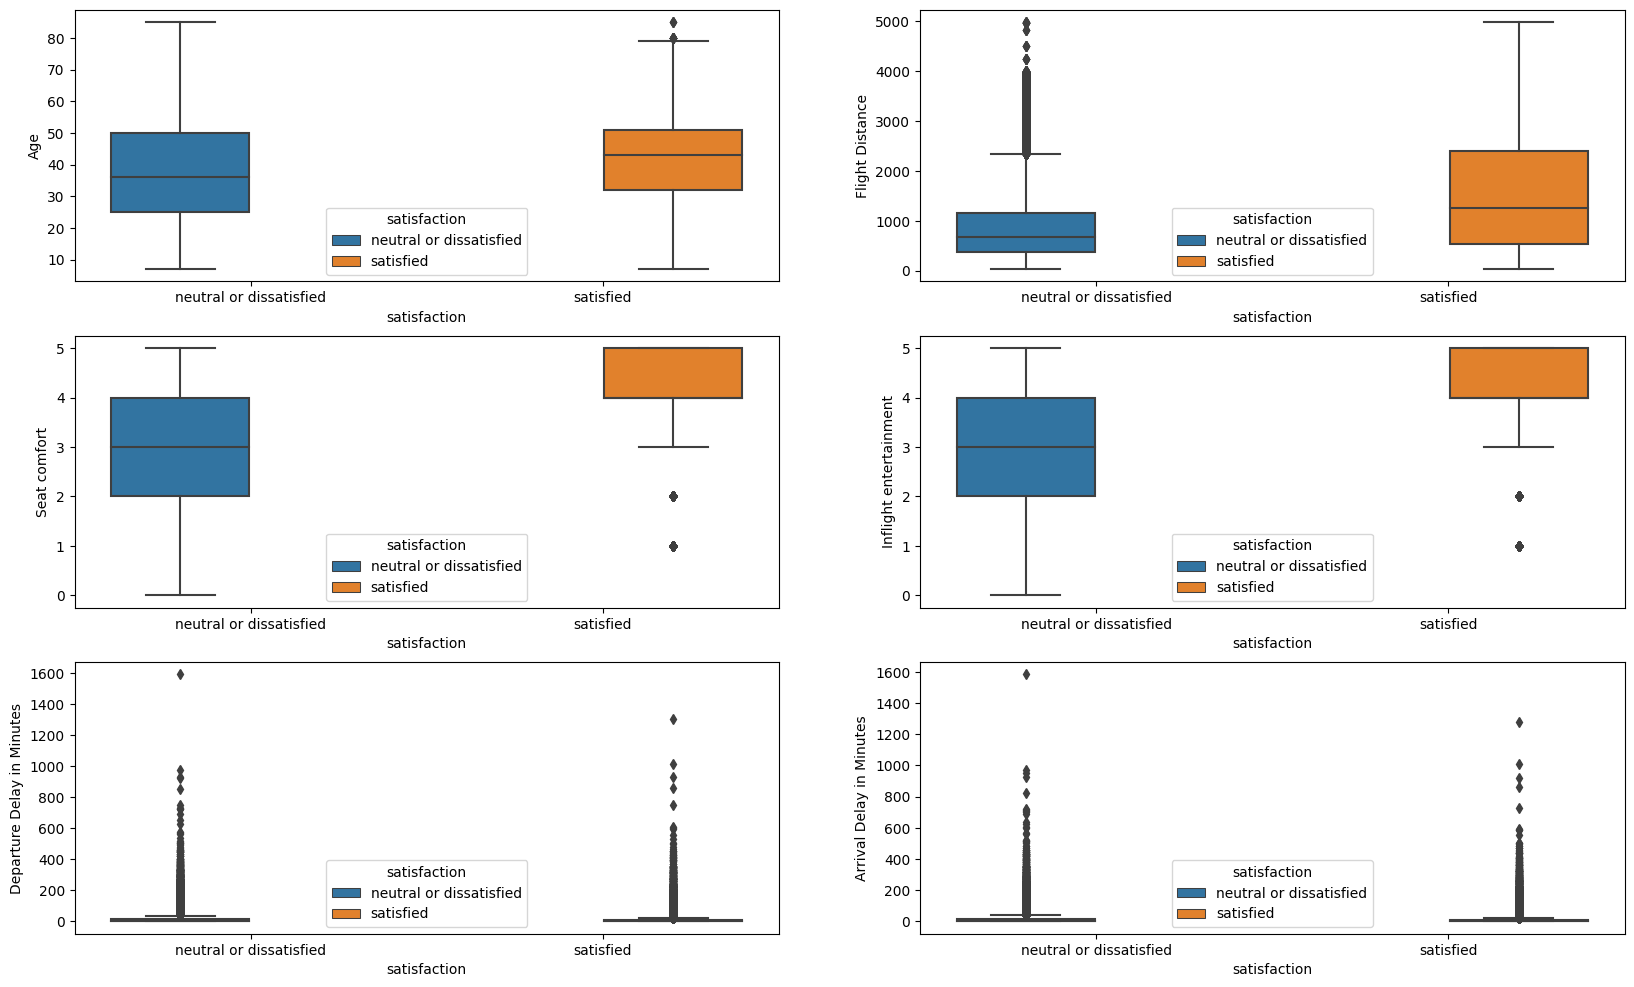

In [16]:
# Relationships built on continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='Age',x = 'satisfaction', hue = 'satisfaction',data = train, ax=axarr[0][0])
sns.boxplot(y='Flight Distance',x = 'satisfaction', hue = 'satisfaction',data = train , ax=axarr[0][1])
sns.boxplot(y='Seat comfort',x = 'satisfaction', hue = 'satisfaction',data = train, ax=axarr[1][0])
sns.boxplot(y='Inflight entertainment',x = 'satisfaction', hue = 'satisfaction',data = train, ax=axarr[1][1])
sns.boxplot(y='Departure Delay in Minutes',x = 'satisfaction', hue = 'satisfaction',data = train, ax=axarr[2][0])
sns.boxplot(y='Arrival Delay in Minutes',x = 'satisfaction', hue = 'satisfaction',data = train, ax=axarr[2][1])

DATA CLEANING

In [17]:
train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [18]:
train['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [19]:
train['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [20]:
train['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [21]:
train['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [23]:
def clean(train):
    # Eliminate the columns "id" and "Unnamed: 0" from the dataset.
    train.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
    #Switch the values of categorical variable to numbers using map function
    train['Customer Type']=train['Customer Type'].map({'Loyal Customer':0,'disloyal Customer':1})
    train['Gender']=train['Gender'].map({'Male':0,'Female':1})
    train['Class']=train['Class'].map({'Eco Plus':0,'Business':1,'Eco':2})
    train['Type of Travel']=train['Type of Travel'].map({'Personal Travel':0,'Business travel':1})
    train['satisfaction']=train['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})
    return train

In [24]:
train=clean(train)
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,13,0,0,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,1,25,1,1,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,0,26,1,1,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,0,25,1,1,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,0,61,1,1,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


Correlation Analysis

it is usually done to analyse the relationship between the output variable and features.There are 2 types of correlation, positive and negative.

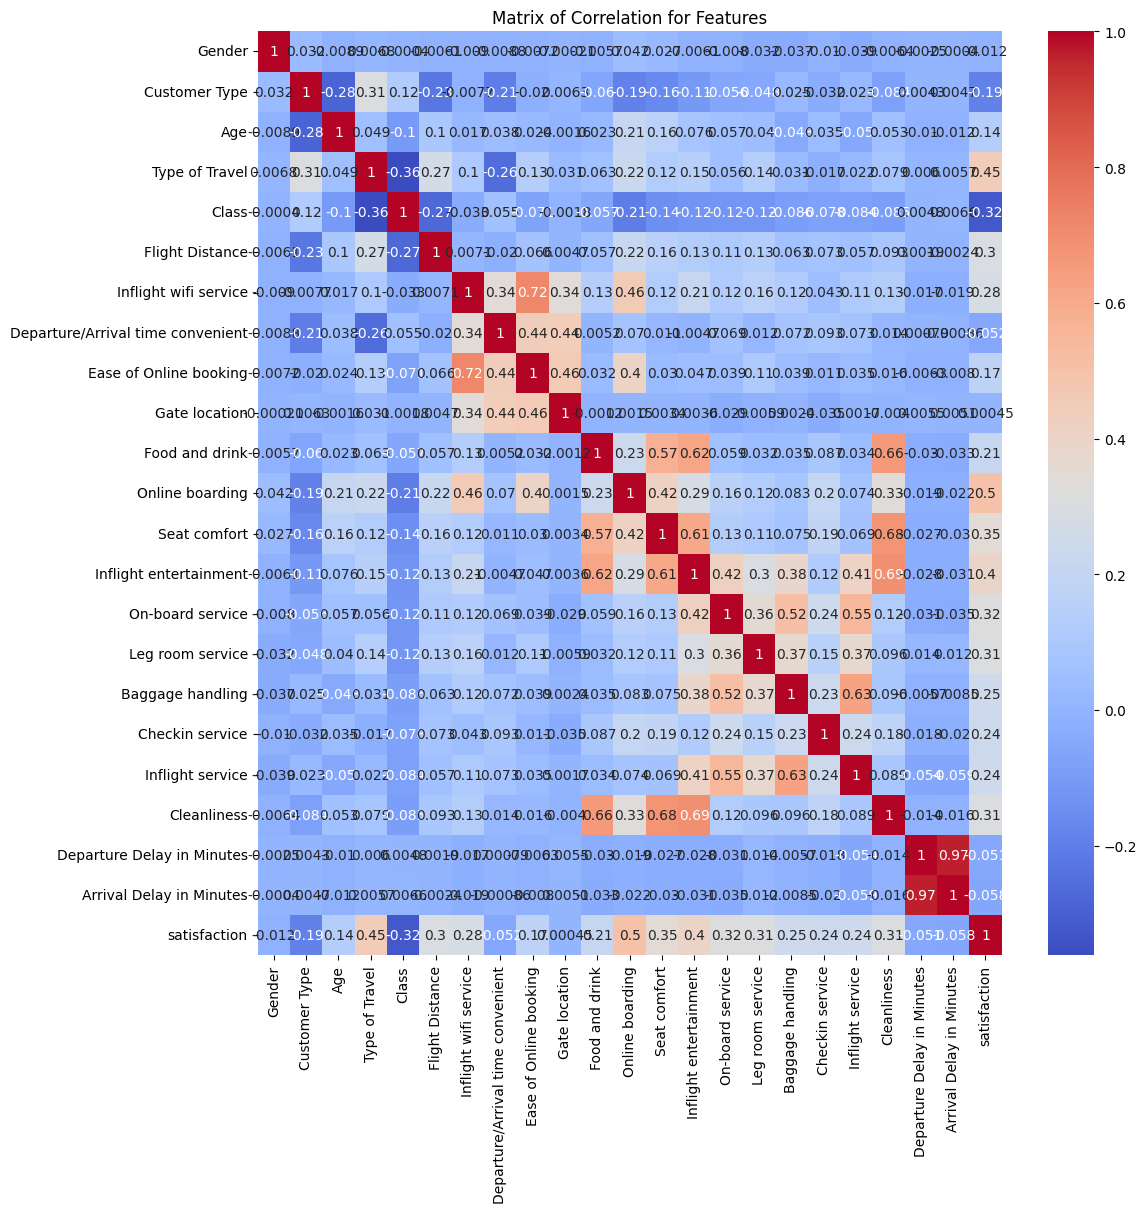

In [72]:
# Selecting the numeric characteristics that will be used in the correlation analysis.
nm_features = train.select_dtypes(include=['int64', 'float64'])

# Generate a correlation matrix
corr_matrix = nm_features.corr()

# Generate a heatmap for visualization.
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrix of Correlation for Features')
plt.show()

Selecting the most important 14 features based on the correlation mattrix

In [29]:
# suppose 'target' is the name of my target variable
target_correlation = corr_matrix['satisfaction'].abs().sort_values(ascending=False)
selcted_features = target_correlation[1:15].index

# Obtain the chosen characteristics from the original DataFrame.
selcted_data = train[selcted_features]

In [87]:
selcted_data.columns

Index(['Online boarding', 'Type of Travel', 'Inflight entertainment',
       'Seat comfort', 'On-board service', 'Class', 'Leg room service',
       'Cleanliness', 'Flight Distance', 'Inflight wifi service',
       'Baggage handling', 'Inflight service', 'Checkin service',
       'Food and drink'],
      dtype='object')

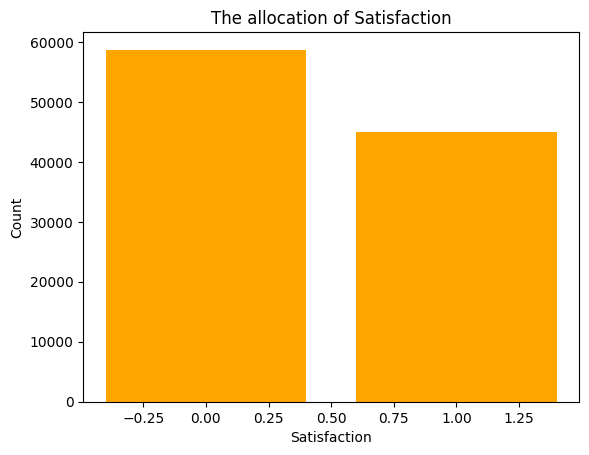

In [32]:
# Determine the frequency of each type of satisfaction.
satisfaction_counts = train['satisfaction'].value_counts()

# Generating the bar graph
plt.bar(satisfaction_counts.index, satisfaction_counts.values,color='orange')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.title('The allocation of Satisfaction')
plt.show()

In [33]:
#spliting into predictor variable and response variable
X=train.drop('satisfaction',axis=1)
y=train['satisfaction']

In [34]:
# Building an SMOTE oversampling technique
smot = SMOTE()
# fiting predictor and target variable
X1, y1 = smot.fit_resample(X, y)

print('initial dataset shape', y.value_counts())
print('Resampled dataset shape', y1.value_counts())

initial dataset shape 0    58697
1    44897
Name: satisfaction, dtype: int64
Resampled dataset shape 0    58697
1    58697
Name: satisfaction, dtype: int64


In [35]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

Standardising the data

This process scales the features to have zero mean and unit variance, ensuring comparability and preventing dominance by any particular feature

In [37]:
scaler = StandardScaler()
# Scaling the training data and testing data
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

###Model

In the project, several methods and algorithms have been used to address the problem of predicting passenger satisfaction based on the given features. we are choosing classification methods based on the predictor variable. our predictor variable is a categorical variable with 3 levels.

Random Forest Classifier

A well-liked ensemble learning technique that mixes different decision trees to create predictions is the Random Forest classifier.

as our response variable is a categorical variable we use this model

In [79]:
from sklearn.metrics import classification_report
# Initialize and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train1, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test1)
y_pred
# calculating accuracy
accuracy_rf = accuracy_score(y_test, y_pred)
report_rf=classification_report(y_test, y_pred)
print("Accuracy:", accuracy_rf)
print(report_rf)

Accuracy: 0.9562161931939179
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11823
           1       0.96      0.95      0.96     11656

    accuracy                           0.96     23479
   macro avg       0.96      0.96      0.96     23479
weighted avg       0.96      0.96      0.96     23479



K-Nearest Neighbors (KNN)

KNN works based on the principle of similarity, where it classifies a new data point by comparing it to the K nearest neighbors in the training set

In [88]:

from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()
k.fit(X_train1, y_train)
y_pred = model.predict(X_test1)
y_pred
accuracy_knn=accuracy_score(y_test,y_pred)
report_knn=classification_report(y_test, y_pred)

print('Accuracy:',accuracy_knn)
print(report_knn)

Accuracy: 0.8580433578942885
              precision    recall  f1-score   support

           0       0.85      0.87      0.86     11823
           1       0.87      0.85      0.86     11656

    accuracy                           0.86     23479
   macro avg       0.86      0.86      0.86     23479
weighted avg       0.86      0.86      0.86     23479



Logistic Regression:

Logistic Regression is a statistical method used for binary classification problems.

In [89]:
# Initialize and train the Logistic Regression classifier
model = LogisticRegression(random_state=42)
model.fit(X_train1, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test1)

# Compute accuracy score
accuracy_lr = accuracy_score(y_test, y_pred)
report_lr=classification_report(y_test, y_pred)
print("Accuracy:", accuracy_lr)
print(report_lr)

Accuracy: 0.8580433578942885
              precision    recall  f1-score   support

           0       0.85      0.87      0.86     11823
           1       0.87      0.85      0.86     11656

    accuracy                           0.86     23479
   macro avg       0.86      0.86      0.86     23479
weighted avg       0.86      0.86      0.86     23479



Neural Network (Sequential Model):

The Keras library has been used to develop a sequential neural network model.

Multiple layers with various activation functions make up the model.
To avoid overfitting, dropout layers have been added.

Using the Adam optimizer, the model was trained with a binary cross-entropy loss function.

In [86]:
#Create a sequential model
modl = Sequential()

# Add layers to the model
modl.add(Dense(640, activation='relu', input_dim=X_train.shape[1]))
modl.add(Dropout(0.5))
modl.add(Dense(124, activation='relu'))
modl.add(Dropout(0.5))
modl.add(Dense(64, activation='relu'))
modl.add(Dropout(0.25))
modl.add(Dense(1, activation='sigmoid'))

# Compile the model
modl.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = modl.fit(X_train1, y_train, validation_data=(X_test1, y_test), epochs=10, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
accuracy_ann = modl.evaluate(X_test1, y_test)
print("Accuracy:", accuracy_ann)#


Epoch 1/10
2935/2935 [==============================] - 18s 6ms/step - loss: 0.2261 - accuracy: 0.9074 - val_loss: 0.1591 - val_accuracy: 0.9359
Epoch 2/10
2935/2935 [==============================] - 21s 7ms/step - loss: 0.1725 - accuracy: 0.9289 - val_loss: 0.1426 - val_accuracy: 0.9415
Epoch 3/10
2935/2935 [==============================] - 19s 6ms/step - loss: 0.1546 - accuracy: 0.9351 - val_loss: 0.1352 - val_accuracy: 0.9417
Epoch 4/10
2935/2935 [==============================] - 17s 6ms/step - loss: 0.1486 - accuracy: 0.9390 - val_loss: 0.1298 - val_accuracy: 0.9455
Epoch 5/10
2935/2935 [==============================] - 19s 6ms/step - loss: 0.1423 - accuracy: 0.9408 - val_loss: 0.1275 - val_accuracy: 0.9444
Epoch 6/10
2935/2935 [==============================] - 17s 6ms/step - loss: 0.1382 - accuracy: 0.9423 - val_loss: 0.1235 - val_accuracy: 0.9465
Epoch 7/10
2935/2935 [==============================] - 17s 6ms/step - loss: 0.1348 - accuracy: 0.9441 - val_loss: 0.1204 - val_ac

In [49]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


Hyperparameter Tuning with RandomizedSearchCV

In [50]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 2 folds for each of 50 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [51]:
bst_modl = rf_random.best_estimator_
bst_modl.fit(X_train1, y_train)

RandomForestClassifier(bootstrap=False, n_estimators=400)

In [66]:
y_pred=bst_modl.predict(X_test1)
# Compute accuracy score
accuracy_rfc = accuracy_score(y_test, y_pred)
report_rfc=classification_report(y_test, y_pred)
print("Accuracy:", accuracy_rfc)
print(report_rfc)

Accuracy: 0.9580476170194642


##**Results**

In [85]:

# Create a DataFrame to store the results
results = pd.DataFrame({'Model': ['Random Forest', 'Logistic Regression', 'Neural Network','knn'],
                        'Accuracy': [accuracy_rf, accuracy_lr, accuracy_ann, accuracy_knn]})
print(results)


                 Model                                   Accuracy
0        Random Forest                                   0.956216
1  Logistic Regression                                   0.858043
2       Neural Network  [0.11723631620407104, 0.9498701095581055]
3                  knn                                   0.858043


*To determine whether the methodology we used on our primary dataset was accurate and produced legitimate findings, we are evaluating the same approaches on a small, separate dataset.

In [53]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [54]:
test=clean(test)
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,52,1,2,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,0,36,1,1,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,0,1,20,1,2,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,0,0,44,1,1,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,1,0,49,1,2,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [55]:
test.dropna(inplace=True)
test.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [56]:
testX=test.drop('satisfaction',axis=1)
testy=test['satisfaction']

In [57]:
testX = scaler.fit_transform(testX)

In [59]:
y_pred_parameter=bst_modl.predict(testX)

In [60]:
accuracy = accuracy_score(testy, y_pred_parameter)
print("Accuracy:", accuracy)

Accuracy: 0.9592167767350249


## **TABLE**
Table showing details of accuracy of all models

In [3]:

# Define the accuracy scores for each algorithm
accuracy_scores = {
    'Random Forest classifier': 0.958,
    'Logistic Regression': 0.858,
    'Neural Network': 0.949,
    'KNN': 0.858,
    'accuracy of test data':0.959
}

# Create a DataFrame from the accuracy scores dictionary
accuracy_df = pd.DataFrame.from_dict(accuracy_scores, orient='index', columns=['Accuracy'])
print(accuracy_df)


                          Accuracy
Random Forest classifier     0.958
Logistic Regression          0.858
Neural Network               0.949
KNN                          0.858
accuracy of test data        0.959


#**CONCLUSION**

On the basis of the given features, three models—Random Forest, Logistic Regression, and Neural network—were applied to the dataset to predict passenger satisfaction. Based on the models' accuracy scores, evaluations were conducted. The Random Forest model had a maximum accuracy of 0.95804 following hyperparameter adjustment with RandomizedSearchCV. While the accuracy of the Neural Network model was 0.9515737.Comparatively, the Logistic Regression and K-Nearest Neighbors (KNN) models achieved lower accuracy scores of 85.80% and 85.80%, respectively.

The use of standardised data helped the models produce more accurate predictions and improved knowledge of the relative relevance of each feature in predicting passenger happiness.
The Random Forest model with optimised hyperparameters was found to be the most effective method for predicting passenger pleasure in this dataset.
Finally, this study shows how machine learning may be used to predict passenger happiness. The results suggest that with standardised data and the Random Forest model with optimised hyperparameters, accurate predictions can be made.

##**Reference**

https://www.kaggle.com/code/ricktenbult/airline-satisfaction-prediction

https://www.kaggle.com/code/nicolasgertler/airline-passenger-satisfaction-prediction-9-6